<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터

In [28]:
import pandas as pd
df_news = pd.read_excel('IT News.xlsx', sheet_name=None)



In [29]:
df_sheets = []
for sheet_name, df in df_news.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2024-01-31, <class 'pandas.core.frame.DataFrame'>
2024-01-30, <class 'pandas.core.frame.DataFrame'>
2024-01-29, <class 'pandas.core.frame.DataFrame'>
2024-01-26, <class 'pandas.core.frame.DataFrame'>
2024-01-25, <class 'pandas.core.frame.DataFrame'>
2024-01-24, <class 'pandas.core.frame.DataFrame'>
2024-01-23, <class 'pandas.core.frame.DataFrame'>
2024-01-22, <class 'pandas.core.frame.DataFrame'>
2024-1-19, <class 'pandas.core.frame.DataFrame'>
2024-1-18, <class 'pandas.core.frame.DataFrame'>
2024-1-17, <class 'pandas.core.frame.DataFrame'>
2024-1-16, <class 'pandas.core.frame.DataFrame'>
2024-1-15, <class 'pandas.core.frame.DataFrame'>
2024-1-12, <class 'pandas.core.frame.DataFrame'>
2024-1-11, <class 'pandas.core.frame.DataFrame'>
2024-1-10, <class 'pandas.core.frame.DataFrame'>
2024-1-9, <class 'pandas.core.frame.DataFrame'>
2024-1-8, <class 'pandas.core.frame.DataFrame'>
2024-1-5, <class 'pandas.core.frame.DataFrame'>
2024-1-4, <class 'pandas.core.frame.DataFrame'>
2024-01-03, <cla

45

In [30]:
df_sheets[0].columns[0]

'이름'

In [ ]:
# 이름으로 컬럼이름 통일
for x in df_sheets :
  if x.columns[0] != '이름' :
    x.rename(columns = {f'{x.columns[0]}':'이름'}, inplace=True)
    pass
df_sheets

In [134]:
# 내가 작성한 뉴스명 기준
# sentences = []
# for sheet in df_sheets:
#   try:
#     sentences.append(sheet.query("이름=='오지수'")['뉴스명'].dropna().values[0])
#   except:
#     pass
#   pass
# sentences


# 전체 뉴스명 기준
sentences = []
for sheet in df_sheets:
   sentences = sheet['뉴스명'].dropna().values.tolist() + sentences
   pass
sentences

['AI가 공무원 문서 작성·민원대응 돕는다…행정서비스에 AI 적용',
 '국내 온라인 쇼핑몰 M사의 개인정보 추정 데이터, 다크웹에 유출',
 '"혹시 불면증?..AI로 자가진단"',
 "ICT 탑재 '스마트건설', 스마트홈기술 향상 견인",
 'NFT, 가상자산법에 적용 안 돼',
 '이커머스 마케터를 위한 IT 솔루션 TOP3',
 '바이러스 기반 항암백신, 美FDA 패스트트랙 최초로 지정',
 '애플 \'도난당한 아이폰\' 보호기능 추가..."중요 데이터 유출 방지"',
 '프롭테크의 진화',
 '11번가는 AI를 쇼핑에 어떻게 활용할',
 "AI폰'정체성 담은 갤럭시 S24.. 자체 인공지능은 물론 제미나이,GPT4까지 탑재한다.",
 '스노우플레이크, 데이터 거래 플랫폼으로 데이터 판매 지원',
 '메타버스 죽었다?…\n한쪽만 보셨군요, \n챗GPT와 만나면 빅뱅',
 'AI가 공무원 문서 작성·민원대응 돕는다…행정서비스에 AI 적용',
 '"웹 3.0 대중화 시대 앞당긴다"…1800억 유치한 라인 넥스트',
 '유방암·파킨슨병 극복 첫발 뗄까… 생명연장 꿈… 내년 임상시험 주목',
 '"언어 몰라도 실시간 통화 가능"…SK텔레콤, \'에이닷 통역콜\' 출시',
 '구글 9월까지 ‘제3자 쿠키’ 100% 차단한다, 매체 매출 감소 불가피',
 "네이처, 2023 과학계 화제 인물에 '챗GPT' 포함",
 "아이폰' 파파고 없이 실시간 음성 번역…버튼만 누르면 OK",
 'AI 입힌 카카오톡, 대화 요약·말투 변경 기능 도입',
 '네이버, 초거대 AI에 건보공단 데이터를… 대국민 건강 서비스 강화',
 "구글, 범용 AI 모델 '제미나이' 공개",
 '메타버스 이끈 한컴프론티스, 내년 한컴 간판 내린다',
 '"SNS 지고 생성형 AI 뜬다, 마케팅 전략 변화 필요해" 가트너 - CIO Korea',
 '비만-알츠하이머 치료제 ‘열풍’',
 '"러시아 해킹집단, 전쟁 중 사이버 공격 활발"',
 '국민은행-빅데이터센터-개소',
 "카카오 '챗봇나우'

In [135]:
# 숫자 삭제, 영문-소문자 통일
sentences = pd.Series(sentences)
sentences = sentences.str.replace('[0-9]','',regex=True).str.lower()
sentences

0        ai가 공무원 문서 작성·민원대응 돕는다…행정서비스에 ai 적용
1        국내 온라인 쇼핑몰 m사의 개인정보 추정 데이터, 다크웹에 유출
2                        "혹시 불면증?..ai로 자가진단"
3               ict 탑재 '스마트건설', 스마트홈기술 향상 견인
4                         nft, 가상자산법에 적용 안 돼
                       ...                  
323       "쇼핑몰 매장·화장실 위치 한눈에"…카카오맵, 실내지도 서비스
324      뇌 안에 컴퓨터 있다... 머스크의 ‘뉴럴링크’, 칩 이식 성공
325    중고거래 플랫폼 구입 에어프라이어, 불량인데 판매자 연락도 안된다?
326        음악가 % "ai로 생계 잃을 것" 우려…작사·작곡에는 활용
327      내 콘텐츠로 무단학습하는 ai… 그림에 `독`타서 저작권 지킨다
Length: 328, dtype: object

In [136]:
!pip install konlpy

In [137]:
# Okt 사용
from konlpy.tag import Okt
okt = Okt()

In [138]:
# 조사, 어미, 구두점, URL 제거
import re
def okt_clean(sentences):
  sentence_list = []
  for sentence in sentences :
    clean_text = []
    for word in okt.pos(sentence, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation','URL']:
            clean_text.append(word[0])
            pass
    sentence_list.append(" ".join(clean_text))
  return sentence_list

In [139]:
sentences_list = okt_clean(sentences)
sentences_list

['ai 가다 공무원 문서 작성 민원 대응 돕다 행정 서비스 ai 적용',
 '국내 온라인 쇼핑몰 m 사의 개인정보 추정 데이터 다크 웹 유출',
 '혹시 불면증 ai 로 자가진단',
 'ict 탑재 스마트 건설 스마트홈 기술 향상 견인',
 'nft 가상 자산 법 적용 안 돼다',
 '이커머스 마케터 위 it 솔루션 top',
 '바이러스 기반 항 암 백신 美 fda 패스트 트랙 최초 지정',
 '애플 도난 당 아이폰 보호 기능 추가 중요 데이터 유출 방지',
 '프롭테크 진화',
 '번가 ai 를 쇼핑 어떻다 활용 하다',
 'ai 폰 정체 성 담다 갤럭시 s 자체 인공 지능 물론 제 미나 이 gpt 탑재 하다',
 '스노우플레이크 데이터 거래 플랫폼 데이터 판매 지원',
 '메타 버스 죽다 \n 한쪽 보다 챗 gpt 오다 만나다 빅뱅',
 'ai 가다 공무원 문서 작성 민원 대응 돕다 행정 서비스 ai 적용',
 '웹 대중화 시대 앞당기다 억 유치하다 라인 넥스트',
 '유방암 파킨슨병 극복 첫 발 떼다 생명연장 꿈 내년 임상시험 주목',
 '언어 모르다 실시간 통화 가능 sk 텔레콤 에이 닷 통역 콜 출시',
 '구글 월 ‘ 제자 쿠키 차단 하다 매체 매출 감소 불가피',
 '네이처 과학계 화제 인물 챗 gpt 포함',
 '아이폰 파파 없이 실시간 음성 번역 버튼 누르다 ok',
 'ai 입히다 카카오 톡 대화 요약 말투 변경 기능 도입',
 '네이버 초 거대 ai 건보 공단 데이터 대국민 건강 서비스 강화',
 '구글 범용 ai 모델 제 미나 이 공개',
 '메타 버스 이끌다 한컴 프론 티스 내년 한컴 간판 내 린다',
 'sns 지고 생 성형 ai 뜨다 마케팅 전략 변화 필요하다 가트너 cio korea',
 '비만 알츠하이머 치료 제 ‘ 열풍',
 '러시아 해킹 집단 전쟁 중 사이버 공격 활발',
 '국민은행 빅데이터 센터 개다',
 '카카오 챗봇 나우 클라우드 커머스 플랫폼 샵 바이 적용',
 '오픈 ai 기술 비밀리 써다 中 바이트 댄스 반박'

## 모델

In [140]:
file_path = 'tfidfVectorizer.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_vector = pickle.load(pickle_file)

In [141]:
# Tokenizing
sentence_tokens = loaded_model_vector.transform(sentences_list) # 학습 형식 그대로 이용
sentence_tokens

<328x27288 sparse matrix of type '<class 'numpy.float64'>'
	with 2423 stored elements in Compressed Sparse Row format>

In [142]:
file_path = 'NLP_classfication_ynanewstitles.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_cate = pickle.load(pickle_file)

In [143]:
# 예측
predict_cate = loaded_model_cate.predict(sentence_tokens.toarray())
predict_cate

array([0., 0., 0., 0., 1., 0., 6., 0., 2., 0., 0., 1., 3., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 0., 2., 0., 0., 4., 2., 0., 0., 2., 2., 0., 2.,
       1., 3., 0., 0., 2., 3., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 3., 4., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 1.,
       3., 0., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 0., 0., 0., 4.,
       0., 0., 0., 6., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 6., 6.,
       0., 0., 0., 1., 0., 2., 0., 4., 4., 0., 0., 0., 0., 0., 2., 0., 2.,
       0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 1., 3., 0., 2., 0., 2., 0., 0., 4., 0., 0., 0.,
       3., 2., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 1., 0., 2.,
       0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.,
       0., 1., 0., 0., 0., 0., 0., 4., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       1., 0., 2., 0., 0.

In [144]:
df_topic = pd.read_csv('topic_dict.csv')
df_topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [145]:
predict_topic = []
for x in predict_cate :
  topic = df_topic.query(f"topic_idx=={x}")['topic'].values[0]
  predict_topic.append(topic)
predict_topic

['IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 '정치',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 '경제',
 '생활문화',
 'IT과학',
 '사회',
 '사회',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 '세계',
 '사회',
 'IT과학',
 'IT과학',
 '사회',
 '사회',
 'IT과학',
 '사회',
 '경제',
 '생활문화',
 'IT과학',
 'IT과학',
 '사회',
 '생활문화',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '생활문화',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 '경제',
 '생활문화',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 '정치',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 '정치',
 '

In [146]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [147]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [148]:
from collections import Counter
noun_count = Counter(predict_topic)
noun_count

Counter({'IT과학': 221, '경제': 30, '정치': 5, '사회': 50, '생활문화': 13, '세계': 9})

## WordCloud

In [149]:
wordCloud.generate_from_frequencies(noun_count)

In [150]:
wordCloud.words_

{'IT과학': 1.0,
 '사회': 0.22624434389140272,
 '경제': 0.13574660633484162,
 '생활문화': 0.058823529411764705,
 '세계': 0.04072398190045249,
 '정치': 0.02262443438914027}

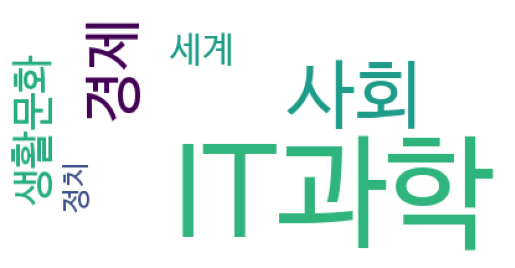

In [151]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()